<a href="https://colab.research.google.com/github/K051/Quantum-Confined-Stark-Effect/blob/main/demo_pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pandas**

In [ ]:
people = {
    "first" : ["pratik", "anurag", "sasi"],
    "last" : ["jha", 'jha', 'bhushan'],
    "email" : ['pjha@infoblox.com', 'ajha@infoblox.com', 'sbhushan@infoblox.com']
}

In [ ]:
import pandas as pd
df = pd.DataFrame(people)

In [ ]:
df

,first,last,email
0,pratik,jha,pjha@infoblox.com
1,anurag,jha,ajha@infoblox.com
2,sasi,bhushan,sbhushan@infoblox.com


#accesing elements

In [ ]:
people['email']     

['pjha@infoblox.com', 'ajha@infoblox.com', 'sbhushan@infoblox.com']

In [ ]:
df['email']

0        pjha@infoblox.com
1        ajha@infoblox.com
2    sbhushan@infoblox.com
Name: email, dtype: object

In [ ]:
type(df['email'])

pandas.core.series.Series

In [ ]:
#Accessing two elements
df[['last', 'email']]

,last,email
0,jha,pjha@infoblox.com
1,jha,ajha@infoblox.com
2,bhushan,sbhushan@infoblox.com


#loc and iloc


In [ ]:
df.iloc[0]

first               pratik
last                   jha
email    pjha@infoblox.com
Name: 0, dtype: object

In [ ]:
df.columns

Index(['first', 'last', 'email'], dtype='object')

In [ ]:
#shows 0 and 2 index
df.iloc[[0,2]]

,first,last,email
0,pratik,jha,pjha@infoblox.com
2,sasi,bhushan,sbhushan@infoblox.com


In [ ]:
#shows 0,2 index 2nd column
df.iloc[[0,2],2]

0        pjha@infoblox.com
2    sbhushan@infoblox.com
Name: email, dtype: object

In [ ]:
#with loc, we can specify what we need
df.loc[[0,1,2],['first', 'email']]

,first,email
0,pratik,pjha@infoblox.com
1,anurag,ajha@infoblox.com
2,sasi,sbhushan@infoblox.com


In [ ]:
#to set index as email and make the change in database too
df.set_index('email', inplace = True)

In [ ]:
df

,first,last
email,,
pjha@infoblox.com,pratik,jha
ajha@infoblox.com,anurag,jha
sbhushan@infoblox.com,sasi,bhushan


In [ ]:
#reset index to normal count
df.reset_index(inplace= True)

In [ ]:
df

,email,first,last
0,pjha@infoblox.com,pratik,jha
1,ajha@infoblox.com,anurag,jha
2,sbhushan@infoblox.com,sasi,bhushan


#Filter

In [ ]:
filt = (df['last'] == 'jha') &  (df['first'] == 'pratik')

In [ ]:
#negation of (showing filter information with column value as email)
df.loc[~filt, 'email']

1        ajha@infoblox.com
2    sbhushan@infoblox.com
Name: email, dtype: object

#Updating rows and columns

In [ ]:
#using list comphrension
df.columns = [x.upper() for x in df.columns]

In [ ]:
df

,EMAIL,FIRST,LAST
0,pjha@infoblox.com,pratik,jha
1,ajha@infoblox.com,anurag,jha
2,sbhushan@infoblox.com,sasi,bhushan


In [ ]:
#renameing columns with a dictionary, with key as to_change and value to new_change
df.rename(columns={'FIRST': 'first name', 'LAST': 'last name'}, inplace = True)

In [ ]:
df

,EMAIL,first name,last name
0,pjha@infoblox.com,pratik,jha
1,ajha@infoblox.com,anurag,jha
2,sbhushan@infoblox.com,sasi,bhushan


In [ ]:
#replacing using str
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df

,EMAIL,first_name,last_name
0,pjha@infoblox.com,pratik,jha
1,ajha@infoblox.com,anurag,jha
2,sbhushan@infoblox.com,sasi,bhushan


In [ ]:
#changing only some values from the column using loc
df.loc[1, ['first_name', 'last_name']] = ['Anurag', 'Jha']

In [ ]:
df

,EMAIL,first_name,last_name
0,pjha@infoblox.com,pratik,jha
1,ajha@infoblox.com,Anurag,Jha
2,sbhushan@infoblox.com,sasi,bhushan


In [ ]:
#using .at instead of .loc (only to change a single value)
df.at[0,'last_name'] = 'Jha'

In [ ]:
df

,EMAIL,first_name,last_name
0,pjha@infoblox.com,pratik,Jha
1,ajha@infoblox.com,Anurag,Jha
2,sbhushan@infoblox.com,sasi,bhushan


In [ ]:
#changing using filter
filt = (df['EMAIL'] == 'sbhushan@infoblox.com')
df.loc[filt, 'first_name'] = 'Sasi'
df

,EMAIL,first_name,last_name
0,pjha@infoblox.com,pratik,Jha
1,ajha@infoblox.com,Anurag,Jha
2,sbhushan@infoblox.com,Sasi,bhushan


In [ ]:
#lower case-ing the columns' name
df.columns = df.columns.str.lower()
df

,email,first_name,last_name
0,pjha@infoblox.com,pratik,Jha
1,ajha@infoblox.com,Anurag,Jha
2,sbhushan@infoblox.com,Sasi,bhushan


apply, map, applymap, replace


#apply
'''works with dataframe and seres objects'''

In [ ]:
#apply for a series
df['email'].apply(len)

0    17
1    17
2    21
Name: email, dtype: int64

In [ ]:
def update_email(email):
  return email.upper()
  

In [ ]:
df['email'].apply(update_email)

0        PJHA@INFOBLOX.COM
1        AJHA@INFOBLOX.COM
2    SBHUSHAN@INFOBLOX.COM
Name: email, dtype: object

In [ ]:
#to apply this to our dataframe
df['email'] = df['email'].apply(update_email)
df

,email,first_name,last_name
0,PJHA@INFOBLOX.COM,pratik,Jha
1,AJHA@INFOBLOX.COM,Anurag,Jha
2,SBHUSHAN@INFOBLOX.COM,Sasi,bhushan


In [ ]:
#lower caseing email with lambda function
df['email'] = df['email'].apply(lambda x: x.lower())
df

,email,first_name,last_name
0,pjha@infoblox.com,pratik,Jha
1,ajha@infoblox.com,Anurag,Jha
2,sbhushan@infoblox.com,Sasi,bhushan


In [ ]:
#applying apply on the whole dataframe
df.apply(len, axis = 'columns')

0    3
1    3
2    3
dtype: int64

In [ ]:
df.at[2, 'last_name'] = 'Bhushan'

In [ ]:
df.apply(pd.Series.min)

email         ajha@infoblox.com
first_name               Anurag
last_name               Bhushan
dtype: object

In [ ]:
df.apply(lambda x : x.min())

email         ajha@infoblox.com
first_name               Anurag
last_name               Bhushan
dtype: object

#applymap
'''works only with dataframe'''

In [ ]:
df.applymap(len)

,email,first_name,last_name
0,17,6,3
1,17,6,3
2,21,4,7


In [ ]:
df.applymap(str.lower)

,email,first_name,last_name
0,pjha@infoblox.com,pratik,jha
1,ajha@infoblox.com,anurag,jha
2,sbhushan@infoblox.com,sasi,bhushan


#map
'''works only with series'''

In [ ]:
df

,email,first_name,last_name
0,pjha@infoblox.com,pratik,Jha
1,ajha@infoblox.com,Anurag,Jha
2,sbhushan@infoblox.com,Sasi,Bhushan


In [ ]:
df['first_name'].map({'pratik':'Pratik'})

0    Pratik
1       NaN
2       NaN
Name: first_name, dtype: object

#replace
'''works only with series'''

In [ ]:
df['first_name'] = df['first_name'].replace({'pratik':'Pratik'})
df

,email,first_name,last_name
0,pjha@infoblox.com,Pratik,Jha
1,ajha@infoblox.com,Anurag,Jha
2,sbhushan@infoblox.com,Sasi,Bhushan


#Add/Remove Rows and Columns From DataFrames


In [ ]:
#adding new column
df['full_name'] = df['first_name'] + ' ' + df['last_name']
df

,email,first_name,last_name,full_name
0,pjha@infoblox.com,Pratik,Jha,Pratik Jha
1,ajha@infoblox.com,Anurag,Jha,Anurag Jha
2,sbhushan@infoblox.com,Sasi,Bhushan,Sasi Bhushan


In [ ]:
#removing columns
df.drop(columns = ['first_name' , 'last_name'], inplace = True)

In [ ]:
df

,email,full_name
0,pjha@infoblox.com,Pratik Jha
1,ajha@infoblox.com,Anurag Jha
2,sbhushan@infoblox.com,Sasi Bhushan


In [ ]:
#splitting 
df['full_name'].str.split(' ', expand = True)

,0,1
0,Pratik,Jha
1,Anurag,Jha
2,Sasi,Bhushan


In [ ]:
#creating new columns form the splitted results
df[['first', 'last']] = df['full_name'].str.split(' ', expand = True)

In [ ]:
df

,email,full_name,first,last
0,pjha@infoblox.com,Pratik Jha,Pratik,Jha
1,ajha@infoblox.com,Anurag Jha,Anurag,Jha
2,sbhushan@infoblox.com,Sasi Bhushan,Sasi,Bhushan


In [ ]:
df.append({'first': 'Ramesh'}, ignore_index=True)

,email,full_name,first,last
0,pjha@infoblox.com,Pratik Jha,Pratik,Jha
1,ajha@infoblox.com,Anurag Jha,Anurag,Jha
2,sbhushan@infoblox.com,Sasi Bhushan,Sasi,Bhushan
3,NaN,NaN,Ramesh,NaN


In [ ]:
people = {
    "first" : ["Tony", "Steve"],
    "last" : ["Stark", 'Rogers'],
    "email" : ['ironman@avengers.com', 'cap@avengers.com']
}
df2 = pd.DataFrame(people)

In [ ]:
#adding new dataframe 
df = df.append(df2, ignore_index=True)
df

,email,full_name,first,last
0,pjha@infoblox.com,Pratik Jha,Pratik,Jha
1,ajha@infoblox.com,Anurag Jha,Anurag,Jha
2,sbhushan@infoblox.com,Sasi Bhushan,Sasi,Bhushan
3,ironman@avengers.com,NaN,Tony,Stark
4,cap@avengers.com,NaN,Steve,Rogers


In [ ]:
#deeting rows
df.drop(index = [2,3])

,email,full_name,first,last
0,pjha@infoblox.com,Pratik Jha,Pratik,Jha
1,ajha@infoblox.com,Anurag Jha,Anurag,Jha
4,cap@avengers.com,NaN,Steve,Rogers


In [ ]:
#removing specifics using filter
filt = df['last'] == 'Jha'
df.drop(index = df[filt].index)

,email,full_name,first,last
2,sbhushan@infoblox.com,Sasi Bhushan,Sasi,Bhushan
3,ironman@avengers.com,NaN,Tony,Stark
4,cap@avengers.com,NaN,Steve,Rogers


In [ ]:
#removing avengers from infoblox
filt = df['email'].str.contains('avengers', na = False)
df.drop(index = df[filt].index, inplace = True)
df

,email,full_name,first,last
0,pjha@infoblox.com,Pratik Jha,Pratik,Jha
1,ajha@infoblox.com,Anurag Jha,Anurag,Jha
2,sbhushan@infoblox.com,Sasi Bhushan,Sasi,Bhushan


#Sorting Data

In [ ]:
#sorted last-(decending order), first-(ascending order)
df.sort_values(by = ['last', 'first'], ascending = [False, True], inplace = True)
df

,email,full_name,first,last
1,ajha@infoblox.com,Anurag Jha,Anurag,Jha
0,pjha@infoblox.com,Pratik Jha,Pratik,Jha
2,sbhushan@infoblox.com,Sasi Bhushan,Sasi,Bhushan


In [ ]:
#sorting back to original
df.sort_index() 

,email,full_name,first,last
0,pjha@infoblox.com,Pratik Jha,Pratik,Jha
1,ajha@infoblox.com,Anurag Jha,Anurag,Jha
2,sbhushan@infoblox.com,Sasi Bhushan,Sasi,Bhushan


In [ ]:
df['last'].sort_values()

2    Bhushan
1        Jha
0        Jha
Name: last, dtype: object

#Grouping and Aggregating - Analyzing and Exploring Your Data


In [ ]:
# country_grp['Trans'].value_counts(normalize=True).loc['Russian Federation']
# country_grp['ConvertedCompYearly'].median().loc['Germany']
# country_grp['ConvertedCompYearly'].agg(['median', 'mean']).loc['Canada']
# country_grp['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('Python').sum())


In [ ]:
'''concat two columns in pandas'''

# python_df = pd.concat([country_respondents, country_use_python], axis = 'columns')
# python_df

'concat two columns in pandas'

#Cleaning Data - Casting Datatypes and Handling Missing Values

In [ ]:
import numpy as np

In [ ]:
people = {
    "first" : ["pratik", "anurag", "sasi", 'Sherlock', np.nan, None, 'NA'],
    "last" : ["jha", 'jha', 'bhushan', 'Holmes', np.nan, 'Missing', np.nan],
    "email" : ['pjha@infoblox.com', 'ajha@infoblox.com', 'sbhushan@infoblox.com',None,  None, np.nan, 'Anonymous@gmail.com'],
    "age" : ['22', '28', '33','38', None, 'Missing', None]
}
df = pd.DataFrame(people)

df.replace('NA', np.nan, inplace= True)
df.replace('Missing', np.nan, inplace= True)

In [ ]:
df

,first,last,email,age
0,pratik,jha,pjha@infoblox.com,22
1,anurag,jha,ajha@infoblox.com,28
2,sasi,bhushan,sbhushan@infoblox.com,33
3,Sherlock,Holmes,None,38
4,NaN,NaN,None,None
5,None,NaN,NaN,NaN
6,NaN,NaN,Anonymous@gmail.com,None


In [ ]:
#dropping na values
df.dropna()

,first,last,email,age
0,pratik,jha,pjha@infoblox.com,22
1,anurag,jha,ajha@infoblox.com,28
2,sasi,bhushan,sbhushan@infoblox.com,33


In [ ]:
#axis = index/columns; how = any/all
df.dropna(axis='index', how='any')

,first,last,email,age
0,pratik,jha,pjha@infoblox.com,22
1,anurag,jha,ajha@infoblox.com,28
2,sasi,bhushan,sbhushan@infoblox.com,33


In [ ]:
df.dropna(axis='index', how='all')

,first,last,email,age
0,pratik,jha,pjha@infoblox.com,22
1,anurag,jha,ajha@infoblox.com,28
2,sasi,bhushan,sbhushan@infoblox.com,33
3,Sherlock,Holmes,None,38
6,NaN,NaN,Anonymous@gmail.com,None


In [ ]:
 #subset removes missing item of the given attribute
 df.dropna(axis='index', how='all', subset=['last', 'email'])

,first,last,email,age
0,pratik,jha,pjha@infoblox.com,22
1,anurag,jha,ajha@infoblox.com,28
2,sasi,bhushan,sbhushan@infoblox.com,33
3,Sherlock,Holmes,None,38
6,NaN,NaN,Anonymous@gmail.com,None


In [ ]:
df.isna() 

,first,last,email,age
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,True,False
4,True,True,True,True
5,True,True,True,True
6,True,True,False,True


In [ ]:
#changing the na values (mostly done with numerical data)
df.fillna(0)

,first,last,email,age
0,pratik,jha,pjha@infoblox.com,22
1,anurag,jha,ajha@infoblox.com,28
2,sasi,bhushan,sbhushan@infoblox.com,33
3,Sherlock,Holmes,0,38
4,0,0,0,0
5,0,0,0,0
6,0,0,Anonymous@gmail.com,0


In [ ]:
df.dtypes

first    object
last     object
email    object
age      object
dtype: object

In [ ]:
# df['age'].mean()

na values are float, thus converted object type of age, to float64 type.

In [ ]:
type(np.nan)

float

In [ ]:
df['age'] = df['age'].astype(float)

In [ ]:
df.dtypes

first     object
last      object
email     object
age      float64
dtype: object

In [ ]:
#mean will work fine this time
df['age'].mean()

30.25

#Working with Dates and Time Series Data

In [ ]:
df = pd.read_csv('ETH_1H.csv', parse_dates=['Date'])

In [ ]:
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [ ]:
# df['Date'] = pd.to_datetime(df['Date'])  

In [ ]:
df.loc[0,'Date'].day_name()

'Thursday'

In [ ]:
df['Date'].dt.day_name()

0         Thursday
1        Wednesday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
34492       Monday
34493       Monday
34494       Monday
34495       Monday
34496       Monday
Name: Date, Length: 34497, dtype: object

In [ ]:
df['DayOfWeek'] = df['Date'].dt.day_name()

In [ ]:
df

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125,Thursday
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299,Wednesday
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279,Wednesday
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131,Wednesday
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622,Wednesday
...,...,...,...,...,...,...,...,...,...
34492,1462813200,2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213,Monday
34493,1462809600,2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450,Monday
34494,1462806000,2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567,Monday
34495,1462802400,2016-05-09 14:00:00,ETHUSD,9.55,10.00,9.55,10.00,235.774075,Monday


In [ ]:
df['Date'].min()

Timestamp('2016-05-09 13:00:00')

In [ ]:
df['Date'].max()

Timestamp('2020-04-16 00:00:00')

In [ ]:
df['Date'].max() - df['Date'].min()

Timedelta('1437 days 11:00:00')

In [ ]:
filt = (df['Date'] >= '2019') & (df['Date'] <= '2020')
df.loc[filt]

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
2544,1577836800000,2020-01-01 00:00:00,ETHUSD,128.84,128.84,128.07,128.11,526.980282,Wednesday
2545,1577833200000,2019-12-31 23:00:00,ETHUSD,128.68,128.85,127.82,128.84,857.650259,Tuesday
2546,1577829600000,2019-12-31 22:00:00,ETHUSD,128.40,128.93,127.77,128.68,3050.507350,Tuesday
2547,1577826000000,2019-12-31 21:00:00,ETHUSD,127.87,128.41,127.81,128.40,447.680372,Tuesday
2548,1577822400000,2019-12-31 20:00:00,ETHUSD,127.86,128.30,127.86,127.87,151.711128,Tuesday
...,...,...,...,...,...,...,...,...,...
11297,1546315200000,2019-01-01 04:00:00,ETHUSD,130.83,133.75,130.83,132.09,1035.840465,Tuesday
11298,1546311600000,2019-01-01 03:00:00,ETHUSD,129.79,131.00,129.79,130.83,1307.299291,Tuesday
11299,1546308000000,2019-01-01 02:00:00,ETHUSD,130.98,130.98,129.25,129.79,837.808380,Tuesday
11300,1546304400000,2019-01-01 01:00:00,ETHUSD,131.10,131.10,128.72,130.98,965.092541,Tuesday


In [ ]:
df.set_index('Date', inplace = True)

In [ ]:
df['2019-12': '2020-02']['Close'].mean()

155.1679463087249

In [ ]:
df['2020-01-01']['High'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


132.57

In [ ]:
#resampling 
highs = df['High'].resample('D').max() 
# highs['2020-01-01']
highs

Date
2016-05-09     12.00
2016-05-10      9.96
2016-05-11     10.47
2016-05-12     12.00
2016-05-13     11.59
               ...  
2020-04-12    165.37
2020-04-13    159.51
2020-04-14    162.15
2020-04-15    161.52
2020-04-16    152.94
Freq: D, Name: High, Length: 1439, dtype: float64

In [ ]:
#plotting the data
%matplotlib inline 

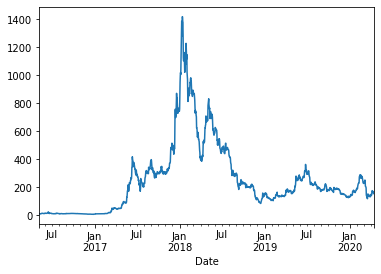

In [ ]:
highs.plot()

In [ ]:
#resampling multiple columns with agg method
df.resample('W').agg({'Close': 'mean', 'High':'max', 'Low':'min', 'Volume':'sum'})

,Close,High,Low,Volume
Date,,,,
2016-05-15,10.205290,12.00,0.00,10988.942273
2016-05-22,13.066964,14.77,10.06,40673.495362
2016-05-29,12.471012,14.43,10.41,58051.809091
2016-06-05,13.594583,16.05,12.41,47351.544496
2016-06-12,14.297798,15.75,13.83,52002.171838
...,...,...,...,...
2020-03-22,124.636012,153.17,100.70,439980.283707
2020-03-29,133.285893,144.14,119.17,230941.584515
2020-04-05,137.627440,150.32,124.09,151022.864981


#Reading/Writing Data to Different Sources - Excel, JSON, SQL, Etc